In [67]:
library(tidyverse)
library(Lahman)
load("bil.RData")
bil$log_worth <- log10(bil$`worth in billions`)
bil$age <- ifelse(bil$age == -1, NA, bil$age)

## Review Exercise
The `storms` table contains data on hurricanes and tropical storms in the U.S. over the past 30 years. Each storm has a `name`, `year`, and `intensity`. Names are unique within years. Intensities can vary through the life of the storm.

Reproduce one of the following two tables:
<table>
    <tr><th>Beginner</th><th>Advanced</th></tr>
    <tr>
        <td>
            <h5>Number of storms each year</h5>
<table class="table">
 <thead>
  <tr>
   <th> year </th>
   <th> num_storms </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td> 1975 </td>
   <td> 3 </td>
  </tr>
  <tr>
   <td> 1976 </td>
   <td> 2 </td>
  </tr>
    <tr><td colspan=2>&#8942;</td>
    </tr>
    <tr>
   <td> 2014 </td>
   <td> 7 </td>
  </tr>
  <tr>
   <td> 2015 </td>
   <td> 11 </td>
  </tr>
</tbody>
</table>
        </td>
        <td><h5>Number of storms which reached Category 4+, by year</h5>
        <table class="table">
 <thead>
  <tr>
   <th> year </th>
   <th> num_storms </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td> 1977 </td>
   <td> 1 </td>
  </tr>
  <tr>
   <td> 1978 </td>
   <td> 0 </td>
  </tr>
  <tr>
    <td colspan=2>&#8942;</td>
  </tr>
  <tr>
   <td> 2014 </td>
   <td> 1 </td>
  </tr>
  <tr>
   <td> 2015 </td>
   <td> 1 </td>
  </tr>
</tbody>
</table>
        </td>
    </tr>
</table>

In [32]:
storms %>% group_by(year) %>% summarize(nd = n_distinct(year, name))

   year nd
1  1975  3
2  1976  2
3  1977  3
4  1978  4
5  1979  7
6  1980  8
7  1981  5
8  1982  5
9  1983  4
10 1984 10
11 1985 10
12 1986  4
13 1987  3
14 1988 10
15 1989 11
16 1990 12
17 1991  9
18 1992  7
19 1993  6
20 1994 11
21 1995 21
22 1996 10
23 1997  7
24 1998 12
25 1999 10
26 2000 16
27 2001 17
28 2002 12
29 2003 20
30 2004 13
31 2005 21
32 2006  9
33 2007 16
34 2008 14
35 2009 10
36 2010 20
37 2011 15
38 2012 17
39 2013 14
40 2014  7
41 2015 11

# Lecture 07: Covariation


In this notebook, we will cover the following cases for studying the **covariation** between two variables.
<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will able to:**

Visualize the distributions of:
* [A categorical and continuous variable](#A-categorical-and-continuous-variable)
* [Two categorical variables](#Two-categorical-variables)
* [Two continuous variables](#Two-continuous-variables)
</div>



## A categorical and continuous variable
To visualize the joint distribution of a continuous and categorical variable, it is most effective to use `group=`, `color=`, `fill=`, and or `facet_*()` to plot the distribution of the continuous variable for each level of the categorical variable.

We can map a categorical variable to, say, the **color** aesthetic in a frequency polygon of a continuous variable.

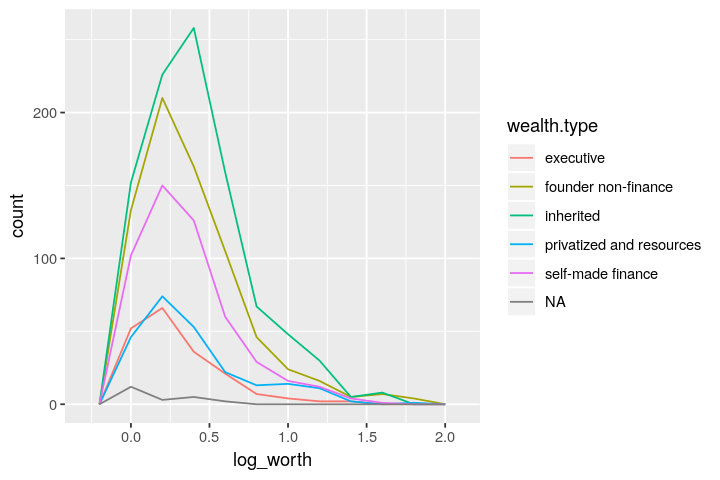

In [27]:
ggplot(data = bil, mapping = aes(x = log_worth)) + 
       geom_freqpoly(mapping = aes(colour = wealth.type), binwidth=.2)

It's hard to compare distributions here because they are not normalized to integrate to one. In other words, the number of different wealth types in the data varies widely:

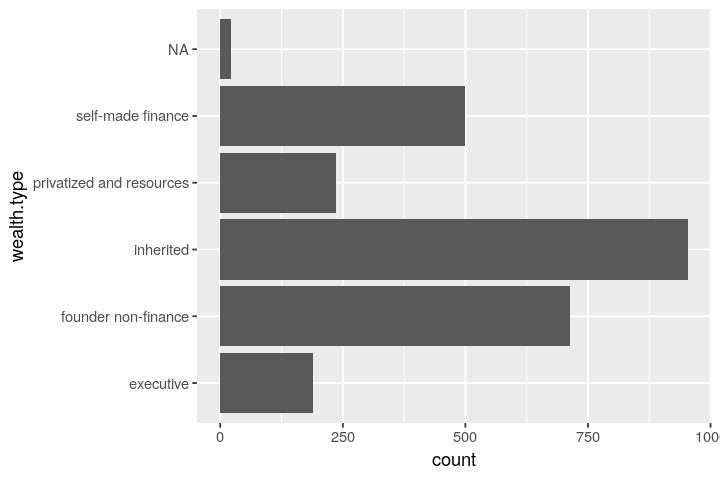

In [63]:
ggplot(bil) + geom_bar(mapping = aes(x = wealth.type)) + coord_flip()

To remedy this we can use the tell ggplot to plot the (estimated) *density* of each random variable rather than the count:

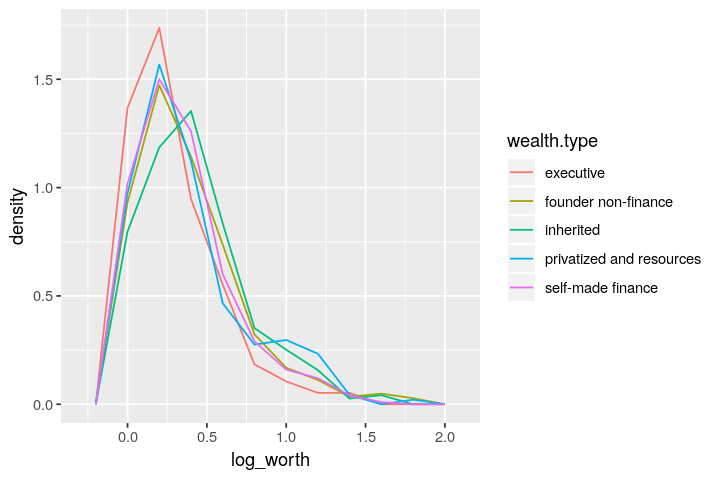

In [29]:
ggplot(data = filter(bil, !is.na(wealth.type)), mapping = aes(x = log_worth)) + 
  geom_freqpoly(mapping = aes(colour = wealth.type, y = ..density..), binwidth = .2)

Note the difference: we have passed the special argument `y = ..density..` to the aesthetic. (The default is `y = ..count..`). 

The "double dots" notation (`y = ..<something>..`) is special to ggplot. You won't encounter it elsewhere.

Even if the data are on the same scale, the default plot may not do a good job of conveying information about covariation. Consider:

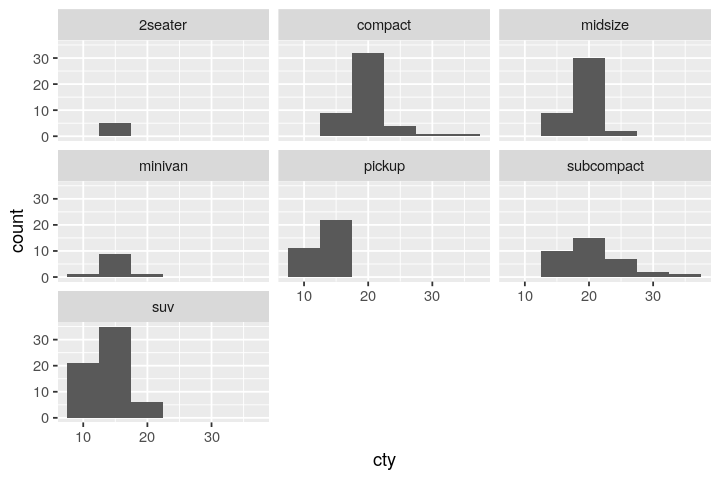

In [30]:
ggplot(data = mpg) +
    geom_histogram(mapping = aes(x = cty), binwidth = 4) + facet_wrap(~ class)

Different fill?

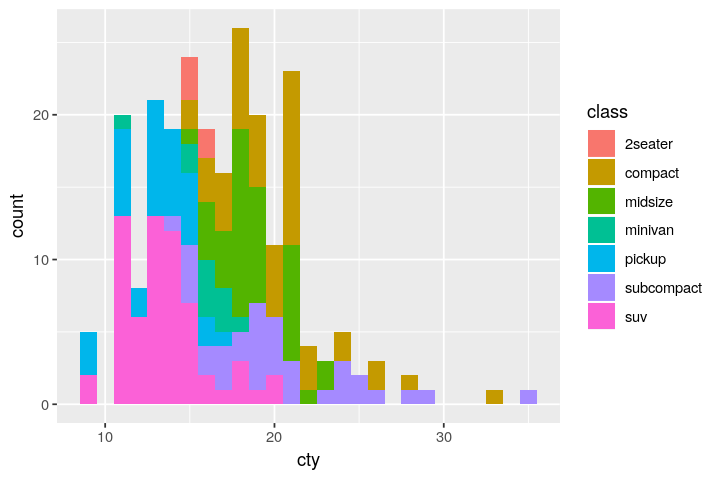

In [31]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty, fill = class), binwidth = 1)

None of the above three plots are especially useful, in my opinion. They are too hard to interpret. If you want to see histograms, a better choice could be one of the `facet_*()` commands:

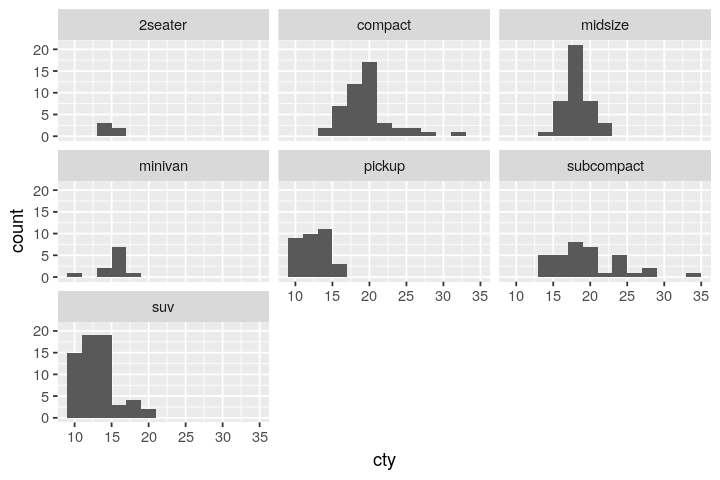

In [34]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty), binwidth = 2) + facet_wrap(~ class, nrow=3)

### Boxplots
Another thing we can do with a categorical, continuous pair is to use a **boxplot**. The way to interpret a boxplot is as a histogram turned on its side:


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



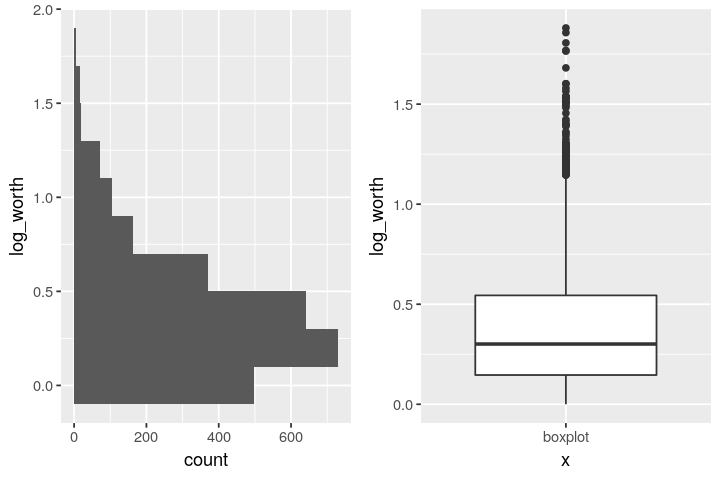

In [35]:
library(gridExtra)
p = ggplot(bil)
p1 = p + geom_histogram(aes(x=log_worth), binwidth=.2) + coord_flip()
p2 = p + geom_boxplot(aes(x='boxplot', y=log_worth))
grid.arrange(p1, p2, ncol=2)

* The black line is the median.
* The lower and upper hinges correspond to the first and third quartiles (the 25th and 75th percentiles).
* The upper whisker extends from the hinge to the largest value no further than 1.5 * IQR from the hinge (where IQR is the inter-quartile range, or distance between the first and third quartiles).
* The lower whisker extends from the hinge to the smallest value at most 1.5 * IQR of the hinge.
* Data beyond the end of the whiskers are called "outlying" points and are plotted individually.

Let's consider the distribution of `log_worth` across different regions:

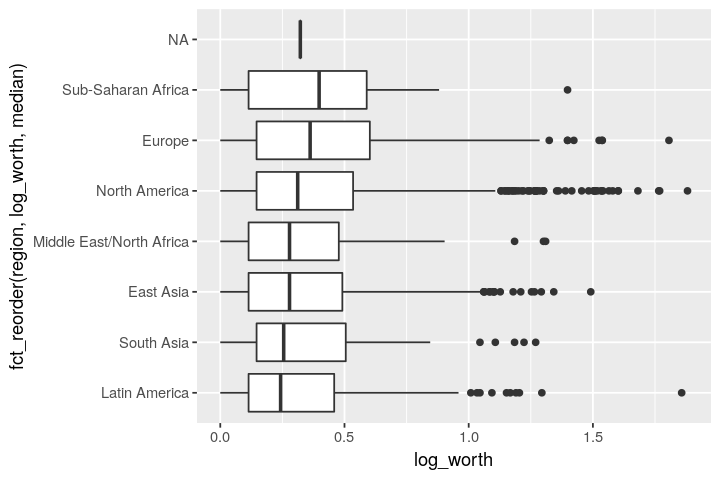

In [37]:
ggplot(data = bil) + 
    geom_boxplot(mapping = aes(x = fct_reorder(region, -log_worth, median), y = log_worth)) + coord_flip()

The `fct_reorder()` function makes the plot look nicer by sorting the regions according to their median `log_worth`. We'll discuss it when we cover factors.

### Violin plots
A final type of distribution plot you might encounter is the violin plot:

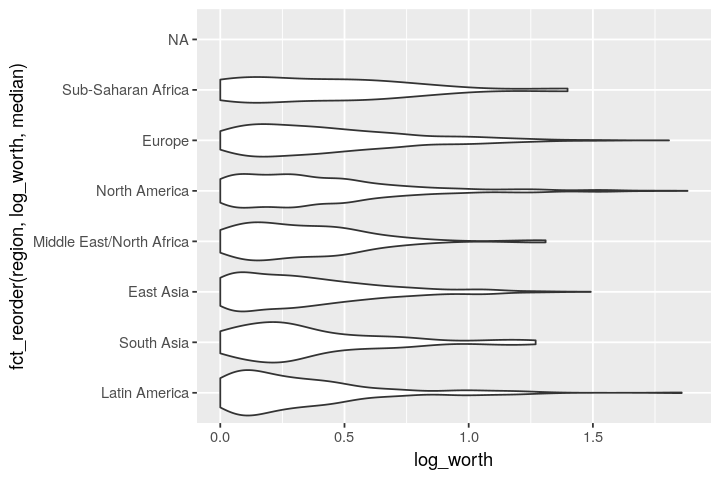

In [38]:
ggplot(data = bil) + 
    geom_violin(mapping = aes(x = fct_reorder(region, log_worth, median), y = log_worth)) +
    coord_flip()

A violin plot is like a combination of box plot and density plot. Compare:

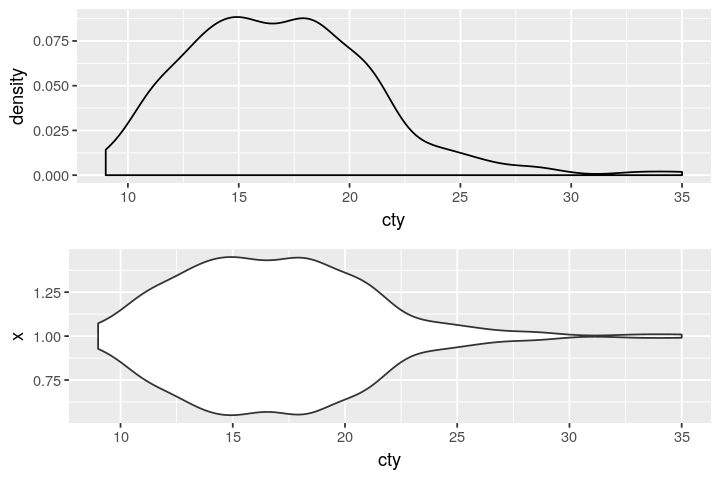

In [39]:
p1 = ggplot(mpg) + geom_density(aes(x=cty))
p2 = ggplot(mpg) + geom_violin(aes(x=1, y=cty)) + coord_flip()
grid.arrange(p1, p2, nrow=2)

## Two categorical variables
`geom_count` can be used to visualize two categorical variables.

In [40]:
table(bil$wealth.type, bil$region)

                          
                           East Asia Europe Latin America
  executive                       45     44             8
  founder non-finance            155    161            30
  inherited                      131    304            96
  privatized and resources        49    111            17
  self-made finance              141     73            30
                          
                           Middle East/North Africa North America South Asia
  executive                                       6            79          4
  founder non-finance                            20           321         22
  inherited                                      51           339         25
  privatized and resources                       16            29         10
  self-made finance                              23           223          8
                          
                           Sub-Saharan Africa
  executive                                 3
  founder non-fin

We can get these numbers into a more plottable form using `count()`.

In [41]:
bil %>% count(region, wealth.type) %>% print

# A tibble: 41 x 3
   region    wealth.type                  n
   <chr>     <chr>                    <int>
 1 East Asia executive                   45
 2 East Asia founder non-finance        155
 3 East Asia inherited                  131
 4 East Asia privatized and resources    49
 5 East Asia self-made finance          141
 6 East Asia <NA>                        14
 7 Europe    executive                   44
 8 Europe    founder non-finance        161
 9 Europe    inherited                  304
10 Europe    privatized and resources   111
# ... with 31 more rows


# A tibble: 41 x 3
   region    wealth.type                  n
   <chr>     <chr>                    <int>
 1 East Asia executive                   45
 2 East Asia founder non-finance        155
 3 East Asia inherited                  131
 4 East Asia privatized and resources    49
 5 East Asia self-made finance          141
 6 East Asia <NA>                        14
 7 Europe    executive                   44
 8 Europe    founder non-finance        161
 9 Europe    inherited                  304
10 Europe    privatized and resources   111
# ... with 31 more rows


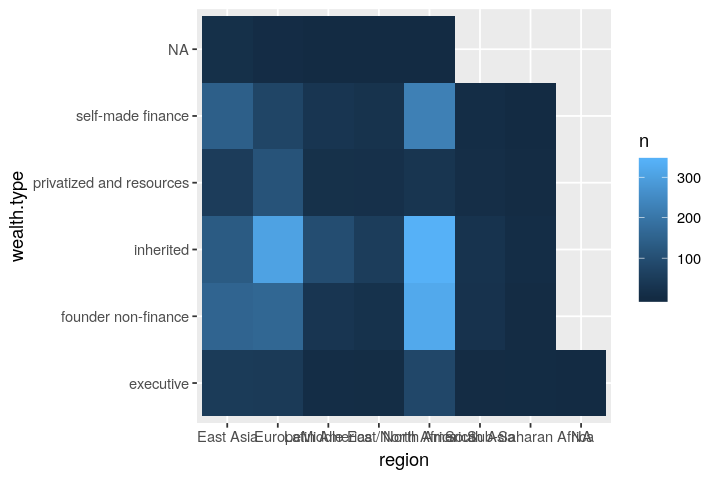

In [42]:
bil %>%
    count(region, wealth.type) %>% 
    ggplot() + geom_tile(mapping = aes(x = region, y = wealth.type, fill = n))

## Two continuous variables
We already know a lot about scatterplots:

Warning message:
“Removed 385 rows containing missing values (geom_point).”

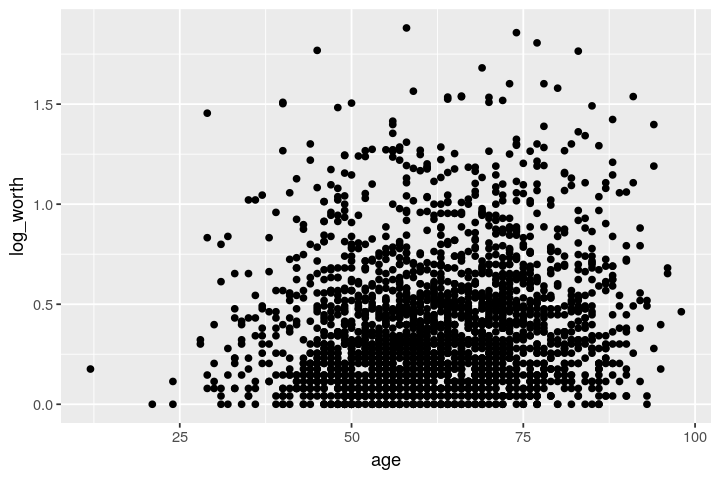

In [48]:
ggplot(data = bil) +
    geom_point(mapping = aes(x = age, log_worth))

`geom_point()` is not really useful for large datasets. Overplotting is a problem; additionally, it takes the computer a long time to plot thousands of points!

As an alternative to `geom_point()` we can use one of the geoms that automatically bins the data, like `geom_bin2d` or `geom_hex`.

Warning message:
“Removed 385 rows containing non-finite values (stat_bin2d).”

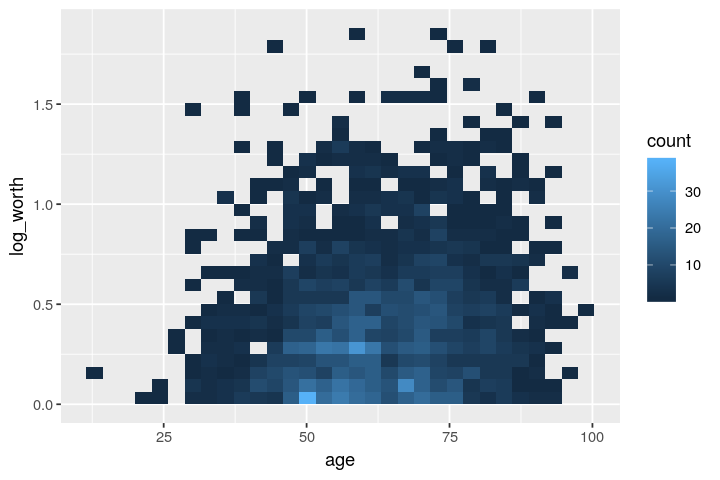

In [49]:
ggplot(data = bil) +
    geom_bin2d(mapping = aes(x = age, y = log_worth))

### Contour plots

A *contour plot* can be used to visualize the density of a pair of continuous random variables. The idea is to estimate their joint density (which is a three-dimensional surface) and then project it into the plane. The contours denote paths of equal height on the density, just like on a map.

Warning message:
“Removed 385 rows containing non-finite values (stat_density2d).”

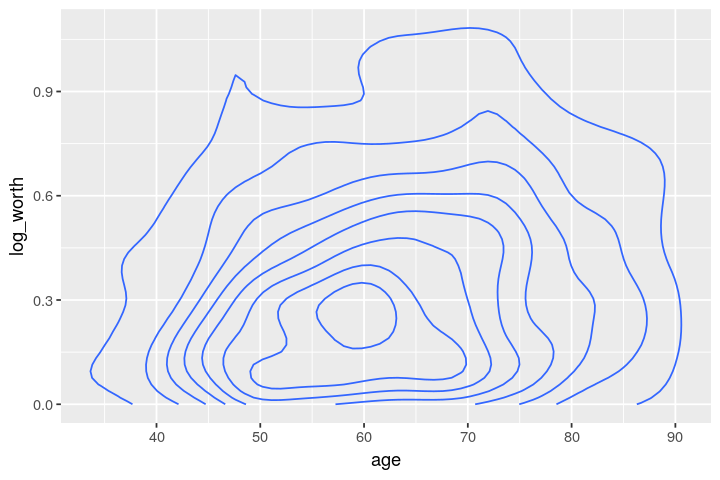

In [80]:
ggplot(bil) + geom_density_2d(aes(x=age, y=log_worth), h=10)

We can color the lines but level for more visual impact, and also choose the amount of smoothing by specifying `binwidth`:

Warning message:
“Removed 385 rows containing non-finite values (stat_density2d).”

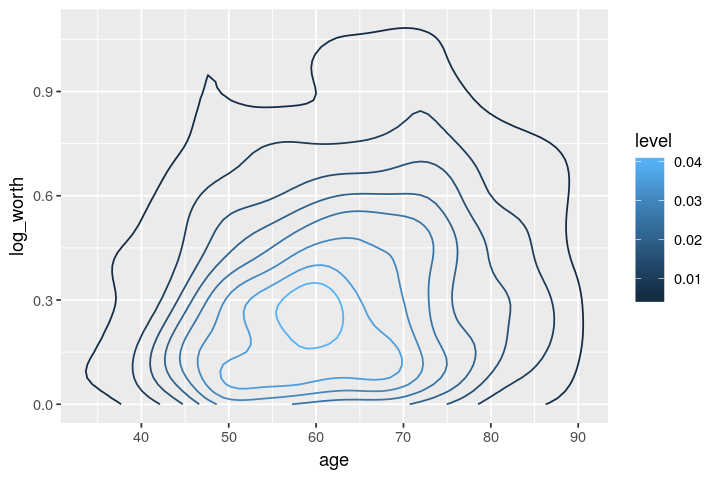

In [81]:
# options(repr.plot.width = 6, repr.plot.height = 4) 
ggplot(bil) + geom_density_2d(aes(x=age, y=log_worth, color=..level..))

### Exercise
Visualize the joint density of hurricane locations (latitude and longitude) in `storms`.

Tip: try adding `+ borders("usa")` to your ggplot.

In [82]:
ggplot(storms) + geom_density_2d(aes(x=lat, y=long)) + borders("usa") + coord_quickmap()

### Exercise
I downloaded time series data on a) [per-capita income in Ann Arbor](https://fred.stlouisfed.org/series/ANNA426PCPI) and ii) [the total population of Paraguay](https://data.worldbank.org/indicator/SP.POP.TOTL?locations=PY) and put them in a table `a2i.pp`:

In [83]:
load("challenge2.RData")
print(a2i.pp)

# A tibble: 48 x 3
    year a2.income para.pop
   <int>     <int>    <dbl>
 1  1969      4679  2412566
 2  1970      4640  2474106
 3  1971      5085  2535359
 4  1972      5538  2596739
 5  1973      6084  2659088
 6  1974      6313  2723523
 7  1975      7100  2790962
 8  1976      7916  2861581
 9  1977      8807  2935375
10  1978      9938  3012829
# ... with 38 more rows


Visualize the joint distribution of income in Ann Arbor and the population of Paraguay, and interpret your findings.

In [84]:
# Code used to create this data:
# p.pop <- read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_10134466.csv", skip=4) %>% 
#         filter(`Country Name` == "Paraguay1")  %>% 
#         select(`1960`:`2017`) %>%  
#         gather(key="Year", value="para.pop") %>% mutate(year = as.integer(Year))
# a2.income <- read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?chart_type=line&recession_bars=on&log_scales=&bgcolor=%23e1e9f0&graph_bgcolor=%23ffffff&fo=Open+Sans&ts=12&tts=12&txtcolor=%23444444&show_legend=yes&show_axis_titles=yes&drp=0&cosd=1969-01-01&coed=2016-01-01&height=450&stacking=&range=&mode=fred&id=ANNA426PCPI&transformation=lin&nd=1969-01-01&ost=-99999&oet=99999&lsv=&lev=&mma=0&fml=a&fgst=lin&fgsnd=2009-06-01&fq=Annual&fam=avg&vintage_date=&revision_date=&line_color=%234572a7&line_style=solid&lw=2&scale=left&mark_type=none&mw=2&width=1168") %>%
#             mutate(year = as.integer(lubridate::year(DATE)), a2.income = ANNA426PCPI)
# a2i.pp <- inner_join(p.pop, a2.income) %>% select(year, a2.income, para.pop)
# save(p.pop, a2.income, a2i.pp, file="challenge2.RData")

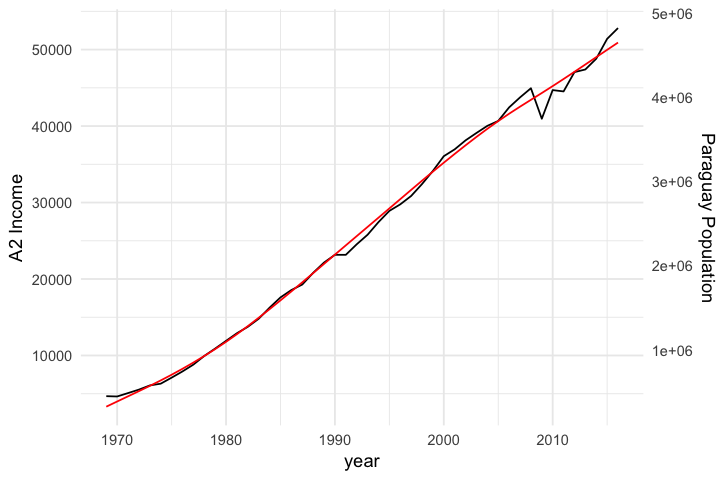

In [96]:
options(repr.plot.height = 4, repr.plot.width=6)

ggplot(a2i.pp, aes(x=year)) + geom_line(aes(y=a2.income)) +
        geom_line(aes(y=para.pop * 1.104e-02-2.333e+04), color="red") +
        ylab("A2 Income") +
        scale_y_continuous(sec.axis = sec_axis(~./1.1e-2+2.333e+04, 
                                               name = "Paraguay Population")) +
        theme_minimal()

### Binning
Another option is to bin one continuous variable so it becomes categorical variable, then use one of the techniques for visualising the combination of a categorical and a continuous variable. The commands `cut_width` and `cut_number` are useful here:

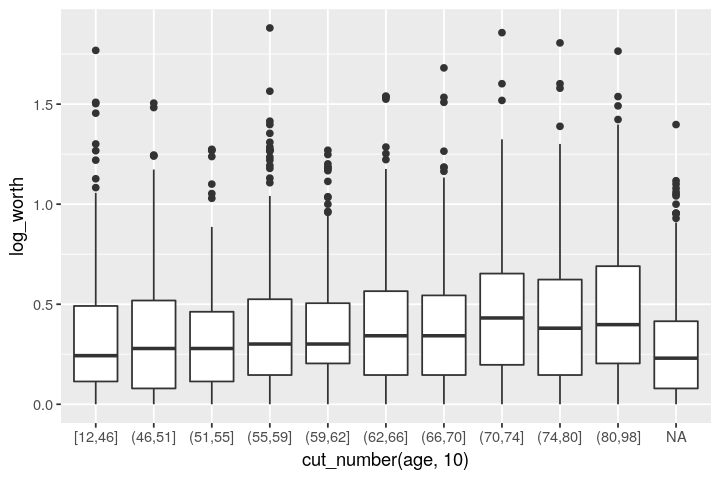

In [85]:
ggplot(bil) + geom_boxplot(aes(x=cut_number(age, 10), y=log_worth))

I like this technique as a way to cut down on clutter.

This cuts age so that it falls into a bin of width 10 years. It has the disadvantage that certain bins (in particular get far more observations than the rest. A related command `cut_number` will select bins so that each has a constant number of observations:

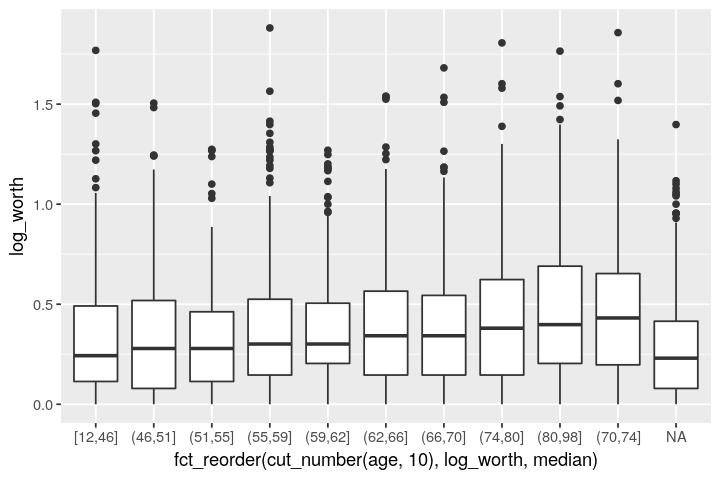

In [86]:
ggplot(bil) + geom_boxplot(aes(x=fct_reorder(cut_width(age, 10), log_worth, median), y=log_worth))

We can combine `cut_number` with `fct_reorder` to get a sorted plot:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


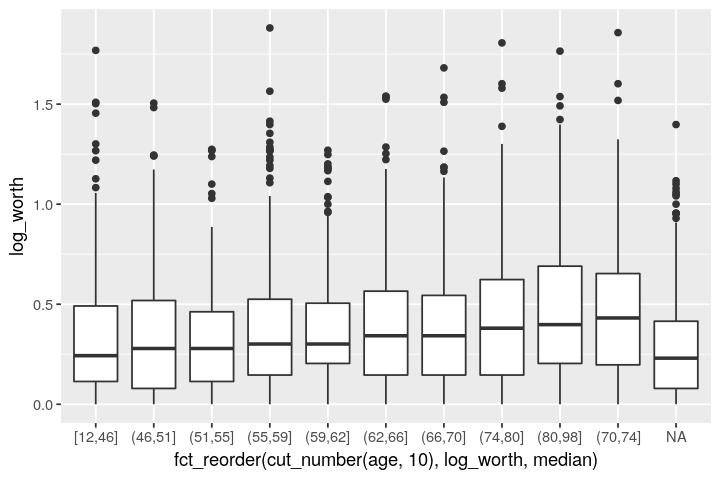

In [87]:
ggplot(bil) + geom_boxplot(aes(x=fct_reorder(cut_number(age, 10), log_worth, median), y=log_worth))

Is this appropriate? In this case no. The $x$ axis already had a natural ordering.

### Exercise
Recall the `Lahman` data set (`library(Lahman)`). The `Teams` table has stats for each team by year. Make a plot showing the distribution of the number of runs scored by each team across various decades:
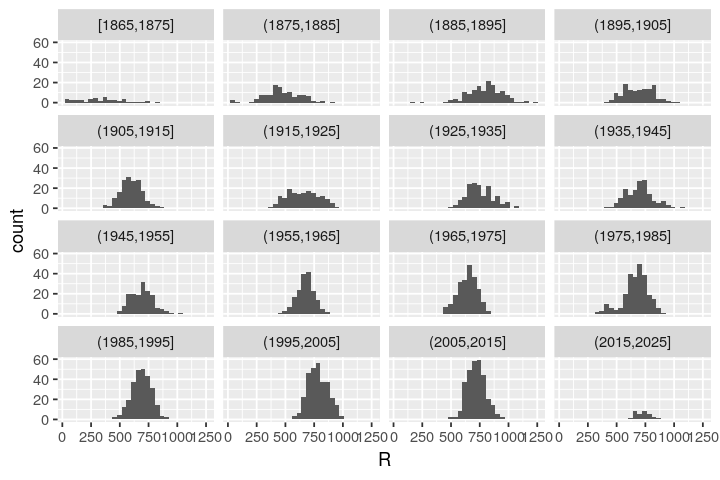